In [ ]:
import os
import numpy as np
import pandas as pd
# #import seaborn as sns
# import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

In [123]:
sc = pd.read_csv(r'C:\Users\raksh\Desktop\Social media\sc.csv')
li = pd.read_csv(r'C:\Users\raksh\Desktop\Social media\li.csv')
ig = pd.read_csv(r'C:\Users\raksh\Desktop\Social media\ig.csv')
tw = pd.read_csv(r'C:\Users\raksh\Desktop\Social media\tw.csv')

In [124]:
pdList = [sc,li,ig,tw]  # List of your dataframes
df = pd.concat(pdList)

In [125]:
df

,content,score,at
0,Snapscore is not updating properly and other b...,1,2022-09-13 18:43:11
1,Not getting notifications even though notifica...,1,2022-09-13 18:39:43
2,It's super fun app...!!! Can you please upload...,5,2022-09-13 18:30:50
3,- Not consumer friendly. Ads and unskippable a...,1,2022-09-13 18:23:26
4,I only want notifications for messages from fr...,1,2022-09-13 18:08:44
...,...,...,...
19995,Overall app experience is good but for devices...,4,2018-09-13 19:02:09
19996,I think there is a bug or maybe its just me. B...,3,2018-09-13 08:17:48
19997,"Great app, love the updates. Only problem is t...",5,2018-09-13 06:57:42
19998,"Ever since the last update, pictures don't loa...",3,2018-09-12 22:25:00


In [ ]:
df.to_csv(r'C:\Users\raksh\Downloads\Compressed\Final_Project-20221204T140354Z-001\Final_Project\data\data.csv',index=False)



In [126]:
#!pip install neattext

In [127]:
df.columns

Index(['content', 'score', 'at'], dtype='object')

In [128]:
# Lowering the text
df['content']= df['content'].apply(lambda x: x.lower())
df.iloc[20]["content"]

'extreme 😎😎😎😎😎 love it yar its amazing l have no words to describe it 😄😄😄its fantastic'

In [129]:
import neattext as nt 

In [130]:
# method/attributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [131]:
import neattext.functions as nfx
df['Clean_Text']=df.content.apply(nfx.remove_userhandles)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_stopwords)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_hashtags)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_special_characters)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emojis)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_phone_numbers)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currencies)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_dates)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_urls)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emails)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currency_symbols)
df['Clean_Text']=df.Clean_Text.apply(nfx.fix_contractions)

In [132]:
df.iloc[65]["content"]

"why i can't use some lenses with magic wand icon?, people on the internet using lenses just fine recording and applying lenses, but for me only can use it on photo and can't apply on my video when recording"

In [133]:
df.iloc[65]["Clean_Text"]

'cant use lenses magic wand icon people internet lenses fine recording applying lenses use photo cant apply video recording'

In [134]:
df.head()

,content,score,at,Clean_Text
0,snapscore is not updating properly and other b...,1,2022-09-13 18:43:11,snapscore updating properly bug found
1,not getting notifications even though notifica...,1,2022-09-13 18:39:43,getting notifications notifications
2,it's super fun app...!!! can you please upload...,5,2022-09-13 18:30:50,super fun app upload saree outfit snapchat
3,- not consumer friendly. ads and unskippable a...,1,2022-09-13 18:23:26,consumer friendly ads unskippable ads stories...
4,i only want notifications for messages from fr...,1,2022-09-13 18:08:44,want notifications messages friends giving ad ...


In [135]:
# Preview some of the pairs of questions
a = 0 
for i in range(a,a+10):
    print(df.Clean_Text[i])
    print()

0               snapscore updating properly bug found 
0                                       good plateform
0    awesome app love post original singing got rem...
0    twitter keeps refreshing sending timeline maki...
Name: Clean_Text, dtype: object

1                  getting notifications notifications
1                                            good nice
1    mark zuckerberg bought software silly problems...
1    looks like load phone pixel 6 pro permissions ...
Name: Clean_Text, dtype: object

2           super fun app upload saree outfit snapchat
2    great app making new connectionsfinding jobs s...
2    need increase reel time duration story too iss...
2    app working all removed cache stopped app rein...
Name: Clean_Text, dtype: object

3     consumer friendly ads unskippable ads stories...
3                                           great work
3    edit feature comment uninteresting ads follow ...
3    latest update 11th september 2022 twitter andr...
Name: Clean_Text, dty

<AxesSubplot:xlabel='score', ylabel='count'>

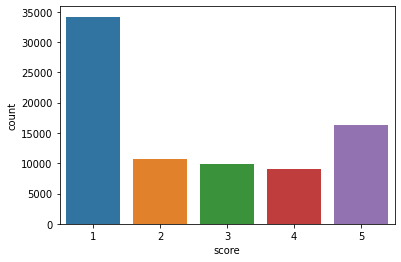

In [95]:
import seaborn as sns
sns.countplot(x = 'score', data = df)

In [96]:
df.describe() #descriptive statistics

,score
count,80000.00000
mean,2.53065
std,1.59600
min,1.00000
25%,1.00000
50%,2.00000
75%,4.00000
max,5.00000


In [97]:
df.duplicated().sum()

0

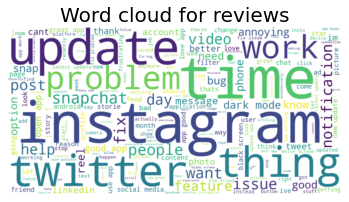

In [98]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

allwords = ' '.join([rev for rev in df['Clean_Text']])
wordcloud = WordCloud(width = 1200, height = 600, random_state = 23, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for reviews',fontsize = 20)
plt.show()

In [136]:
from textblob import TextBlob
df['polarity'] = df.content.apply(lambda x: TextBlob(x).polarity)
df['subjectivity'] = df.content.apply(lambda x: TextBlob(x).subjectivity)

df.head()

,content,score,at,Clean_Text,polarity,subjectivity
0,snapscore is not updating properly and other b...,1,2022-09-13 18:43:11,snapscore updating properly bug found,-0.062500,0.237500
1,not getting notifications even though notifica...,1,2022-09-13 18:39:43,getting notifications notifications,0.000000,0.000000
2,it's super fun app...!!! can you please upload...,5,2022-09-13 18:30:50,super fun app upload saree outfit snapchat,0.459635,0.433333
3,- not consumer friendly. ads and unskippable a...,1,2022-09-13 18:23:26,consumer friendly ads unskippable ads stories...,0.065476,0.416667
4,i only want notifications for messages from fr...,1,2022-09-13 18:08:44,want notifications messages friends giving ad ...,-0.050000,0.441667


In [137]:
df['sentiment'] = np.where(df.polarity > 0, 'positive', np.where(df.polarity < 0, 'negative', 'neutral'))
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]
df.head()

,content,score,at,Clean_Text,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,2022-09-13 18:43:11,snapscore updating properly bug found,-0.062500,0.237500,0
1,not getting notifications even though notifica...,1,2022-09-13 18:39:43,getting notifications notifications,0.000000,0.000000,0
2,it's super fun app...!!! can you please upload...,5,2022-09-13 18:30:50,super fun app upload saree outfit snapchat,0.459635,0.433333,1
3,- not consumer friendly. ads and unskippable a...,1,2022-09-13 18:23:26,consumer friendly ads unskippable ads stories...,0.065476,0.416667,1
4,i only want notifications for messages from fr...,1,2022-09-13 18:08:44,want notifications messages friends giving ad ...,-0.050000,0.441667,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

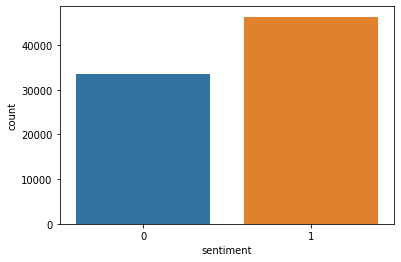

In [138]:
sns.countplot(x = 'sentiment', data = df)

In [139]:
# Shows the top 5 tweets with highest polarity scores
df.nlargest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
19,the app is the best but when i send massage to...,app best send massage person message sent fix ...
149,awesome app to take best snaps ever .....luv s...,awesome app best snaps luv snapchat
237,hey i love the app u may be wondering why i ga...,hey love app u wondering gave 1 star because w...
265,this is very best application but now it's not...,best application works update working tell do
272,this is awesome i like it but some problems......,awesome like problems
296,it's wonderful to take pictures and do streaks✨,wonderful pictures streaks
345,it the best app for talking with friends,best app talking friends
380,app is extremely excellent 👍👍👌👌 but one proble...,app extremely excellent problem app change us...
405,this is the world best app becuse i can see lo...,world best app becuse location brother 100007 ...
456,this is the best app for selfies and chanting ...,best app selfies chanting friends


In [103]:
# Shows the top 5 tweets with highest polarity scores
df.nlargest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
19,the app is the best but when i send massage to...,app best send massage person message sent fix ...
149,awesome app to take best snaps ever .....luv s...,awesome app best snaps luv snapchat
237,hey i love the app u may be wondering why i ga...,hey love app u wondering gave 1 star because w...
265,this is very best application but now it's not...,best application works update working tell do
272,this is awesome i like it but some problems......,awesome like problems
296,it's wonderful to take pictures and do streaks✨,wonderful pictures streaks
345,it the best app for talking with friends,best app talking friends
380,app is extremely excellent 👍👍👌👌 but one proble...,app extremely excellent problem app change us...
405,this is the world best app becuse i can see lo...,world best app becuse location brother 100007 ...
456,this is the best app for selfies and chanting ...,best app selfies chanting friends


In [104]:
# Shows the top 5 tweets with lowest polarity scores
df.nsmallest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
6,"9. 13. 22- the camera keeps freezing, if you t...",9 13 22 camera keeps freezing try pic filter w...
391,pictures look terrible on z fold 4. no optimiz...,pictures look terrible z fold 4 optimization w...
495,it horrible it to me laggy and it doesn't let ...,horrible laggy let messages
520,worst customer support. lot of bugs in the app...,worst customer support lot bugs application ca...
644,it don't work at all! they need to fix it now ...,work all need fix cant account fix promblem ra...
728,this app is the worst i have to update it ever...,app worst update evertime want use
737,snapchat widget not working also terrible came...,snapchat widget working terrible camera perfor...
1115,i'm not getting notifications.its horrible oth...,im getting notificationsits horrible okayjust ...
1180,"horrible photos now, everything is blurry no m...",horrible photos now blurry matter now s21ultra
1332,"it won""t let me sign up fix the error please i...",wont let sign fix error annoying


In [140]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 33631 i.e. 42.04 % of the dataset
Negative reviews are 46369 i.e. 57.96 % of the dataset


In [141]:
df

,content,score,at,Clean_Text,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,2022-09-13 18:43:11,snapscore updating properly bug found,-0.062500,0.237500,0
1,not getting notifications even though notifica...,1,2022-09-13 18:39:43,getting notifications notifications,0.000000,0.000000,0
2,it's super fun app...!!! can you please upload...,5,2022-09-13 18:30:50,super fun app upload saree outfit snapchat,0.459635,0.433333,1
3,- not consumer friendly. ads and unskippable a...,1,2022-09-13 18:23:26,consumer friendly ads unskippable ads stories...,0.065476,0.416667,1
4,i only want notifications for messages from fr...,1,2022-09-13 18:08:44,want notifications messages friends giving ad ...,-0.050000,0.441667,0
...,...,...,...,...,...,...,...
19995,overall app experience is good but for devices...,4,2018-09-13 19:02:09,overall app experience good devices like s8 s9...,0.350000,0.425000,1
19996,i think there is a bug or maybe its just me. b...,3,2018-09-13 08:17:48,think bug maybe me receive notificacion single...,0.032143,0.403571,1
19997,"great app, love the updates. only problem is t...",5,2018-09-13 06:57:42,great app love updates problem android 9 tappi...,0.200000,0.575000,1
19998,"ever since the last update, pictures don't loa...",3,2018-09-12 22:25:00,update pictures load wifi wifi connection fine...,0.040278,0.488889,1


In [142]:
df.to_csv('clean_data.csv', index = False,)

Positive reviews are 33631 i.e. 42.04 % of the dataset


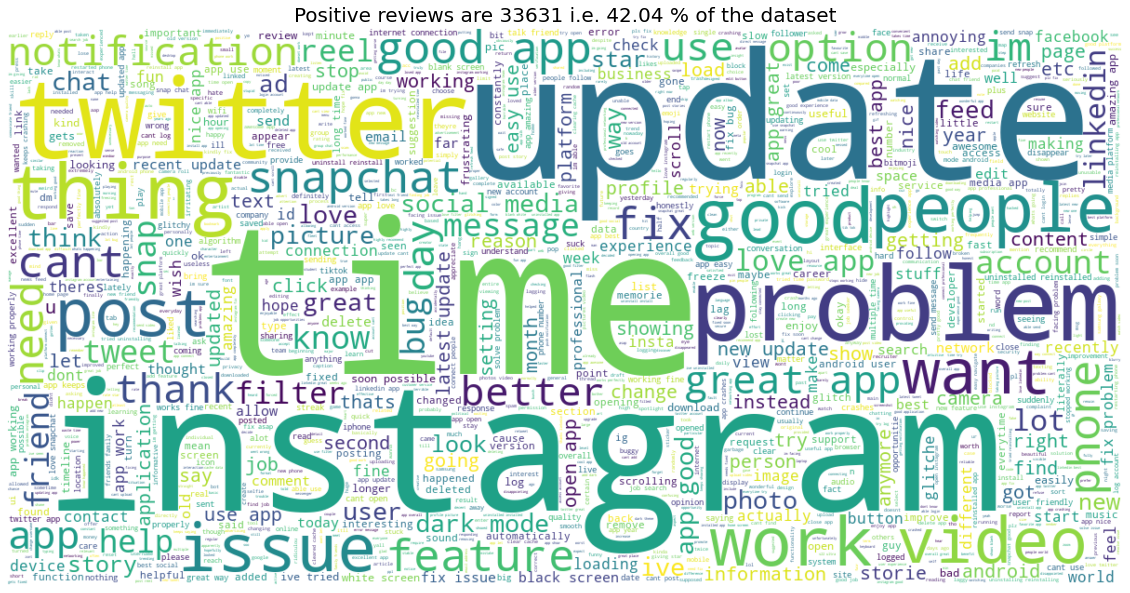

In [144]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

from wordcloud import WordCloud
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['Clean_Text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive reviews are 33631 i.e. 42.04 % of the dataset',fontsize = 20)
plt.show()

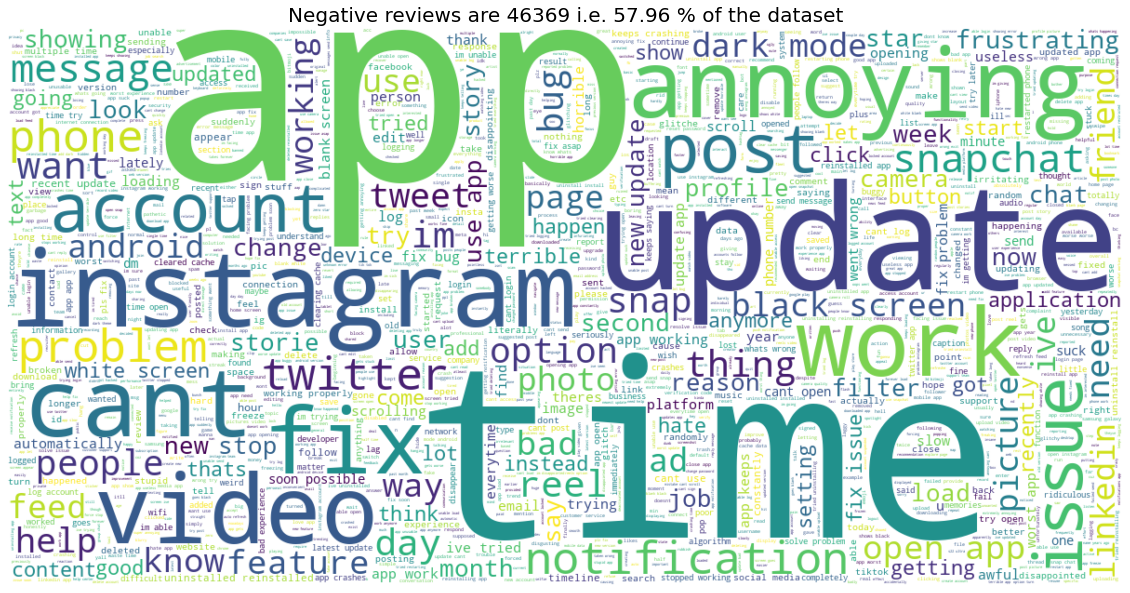

In [145]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['Clean_Text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative reviews are 46369 i.e. 57.96 % of the dataset',fontsize = 20)
plt.show()

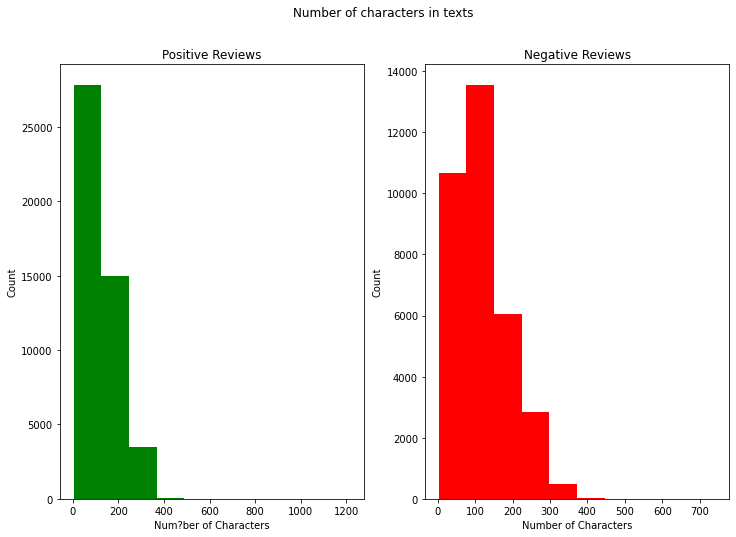

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Num?ber of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

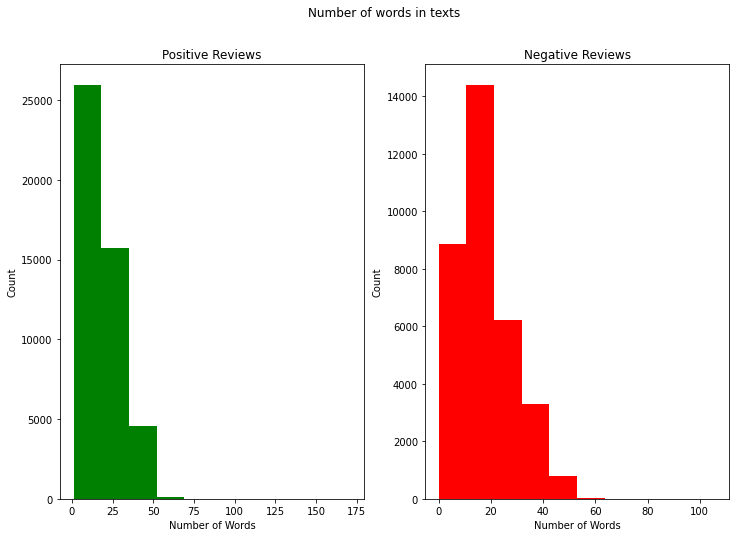

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

C:\Users\raksh\anaconda3\envs\sentiment\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\raksh\anaconda3\envs\sentiment\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


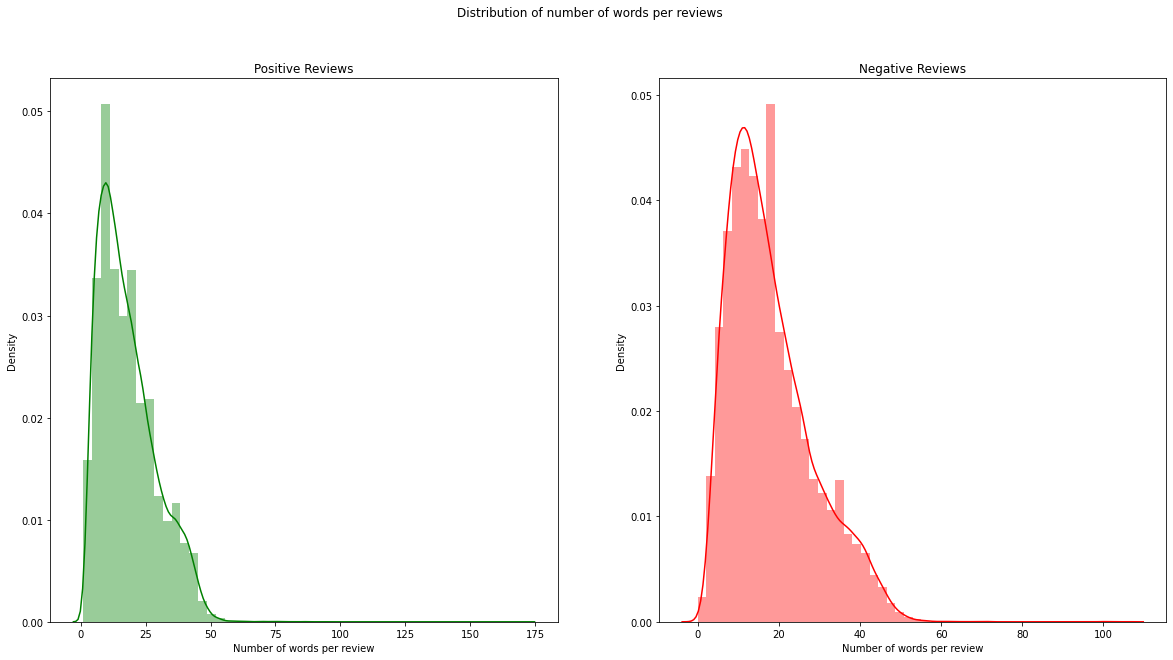

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

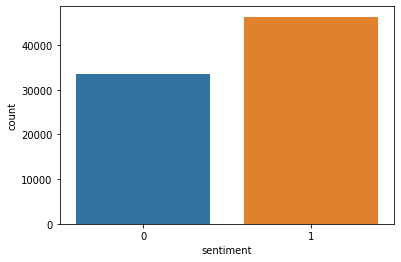

In [50]:
sns.countplot(x = 'sentiment', data = df)

In [18]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Clean_Text)
corpus[:5]

['snapscore', 'updating', 'properly', 'bug', 'found']

In [19]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,app,55964
1,cant,14428
2,like,12935
3,update,12099
4,fix,11816
5,good,10539
6,use,9883
7,account,9680
8,instagram,9678
9,it,9410


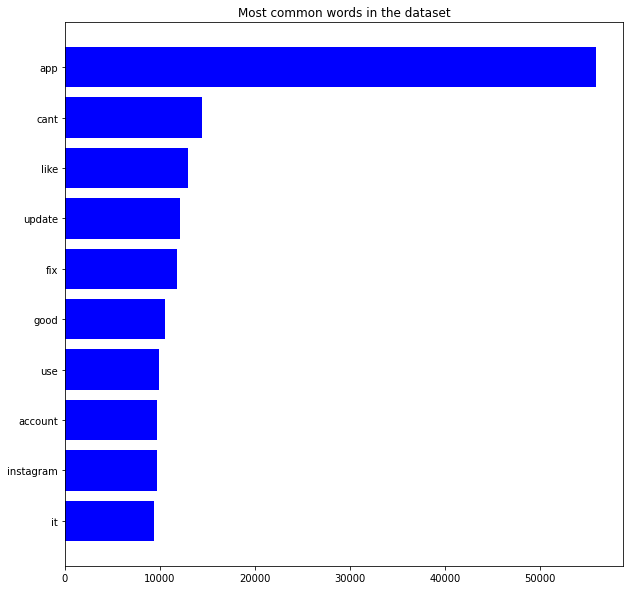

In [53]:
most_common = most_common.sort_values('countv')
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

In [54]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

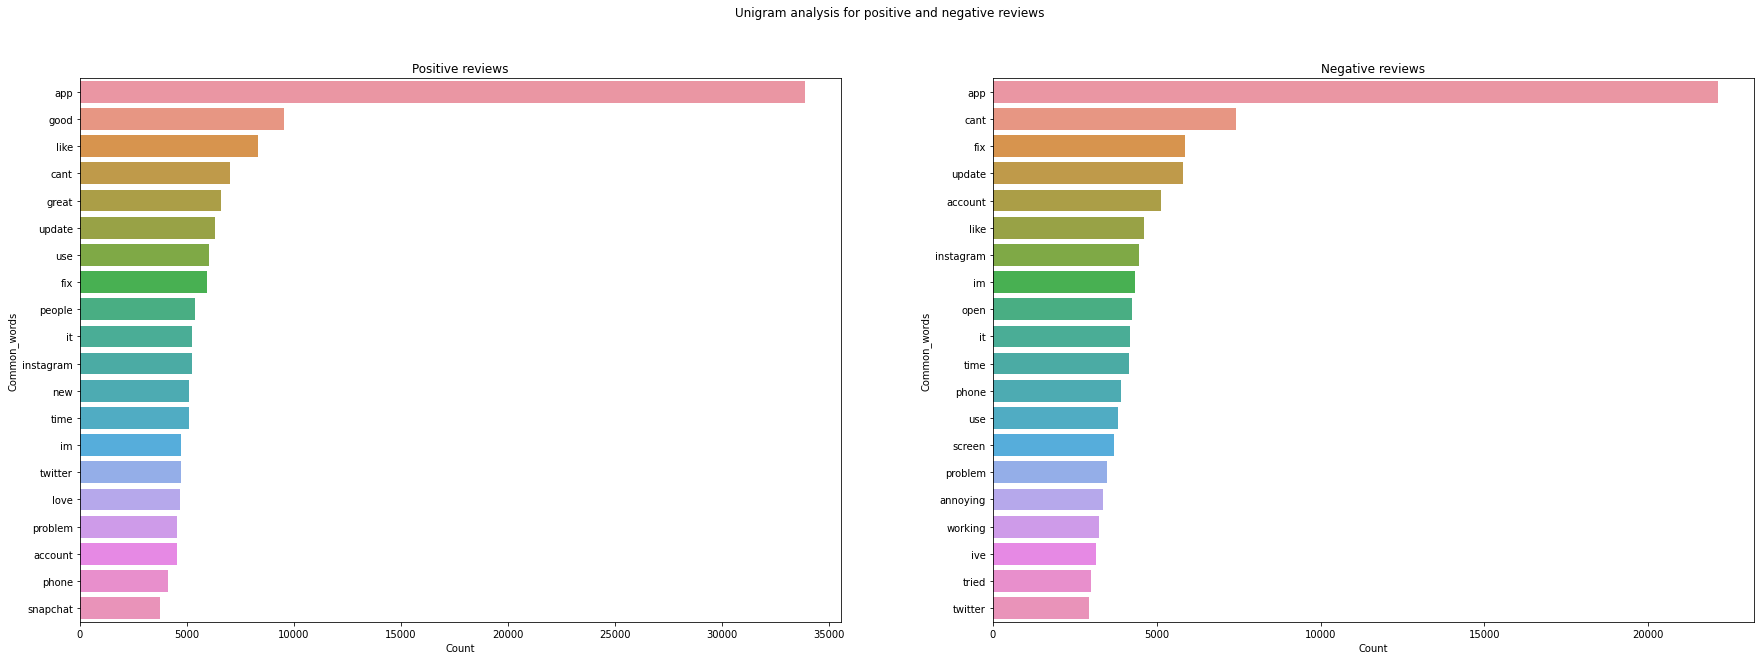

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30, 10))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

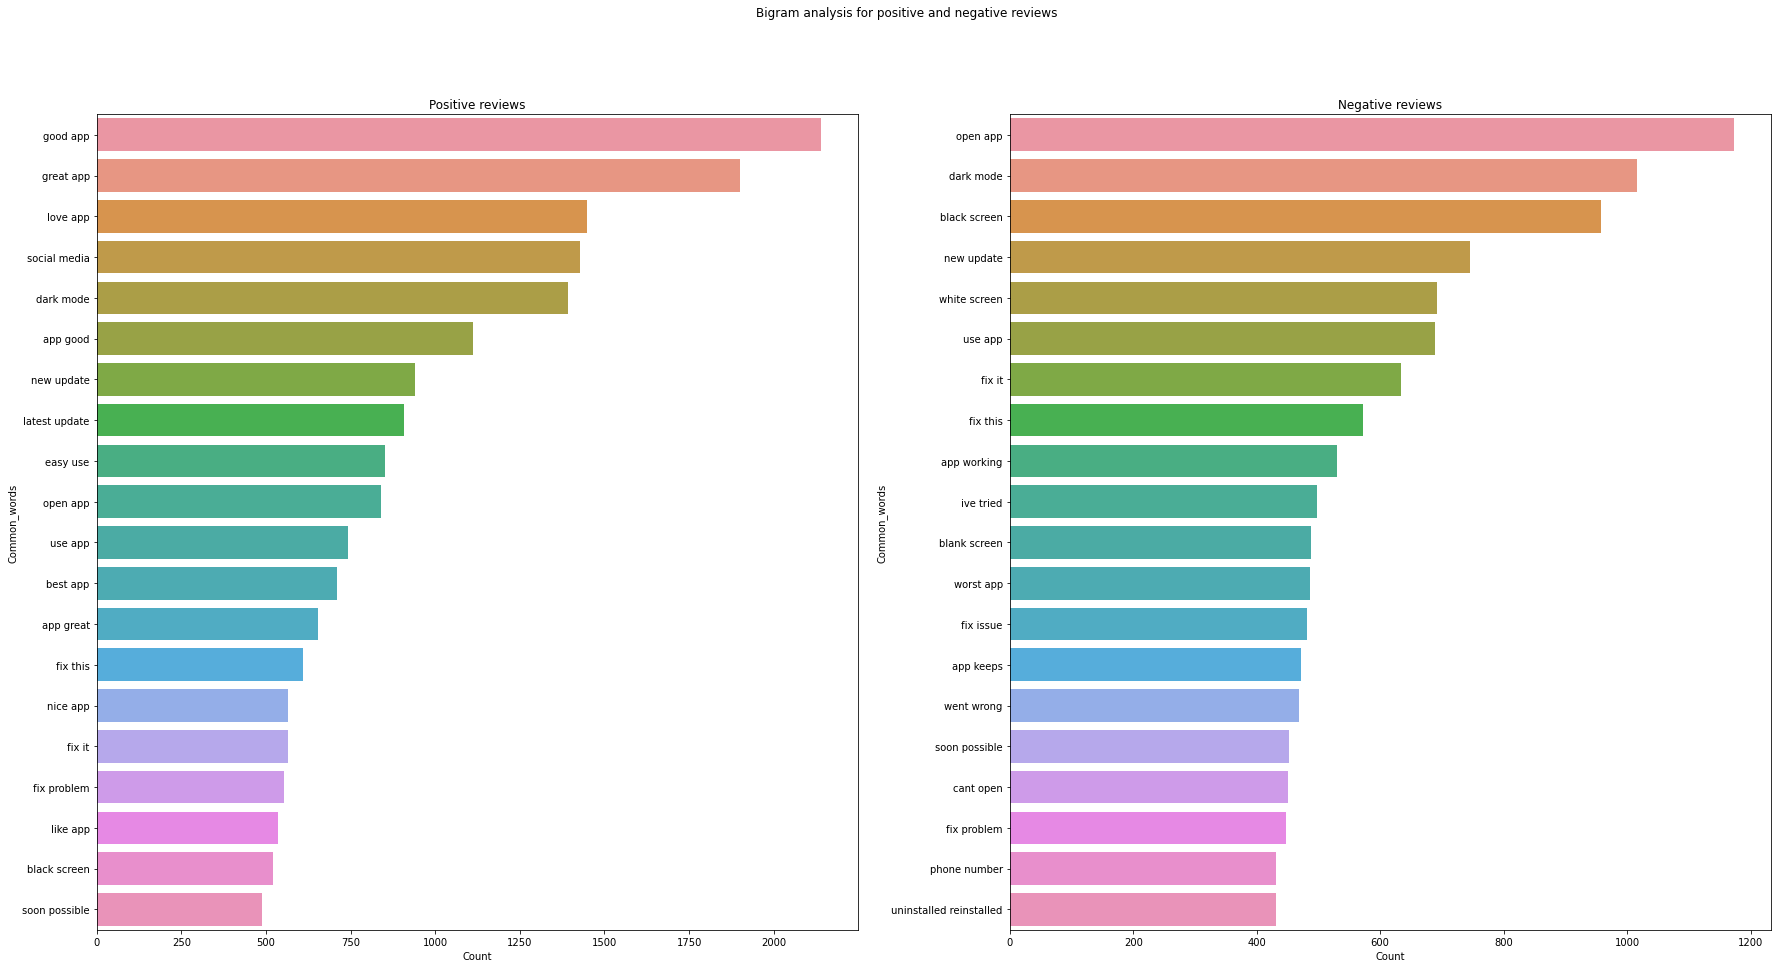

In [56]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

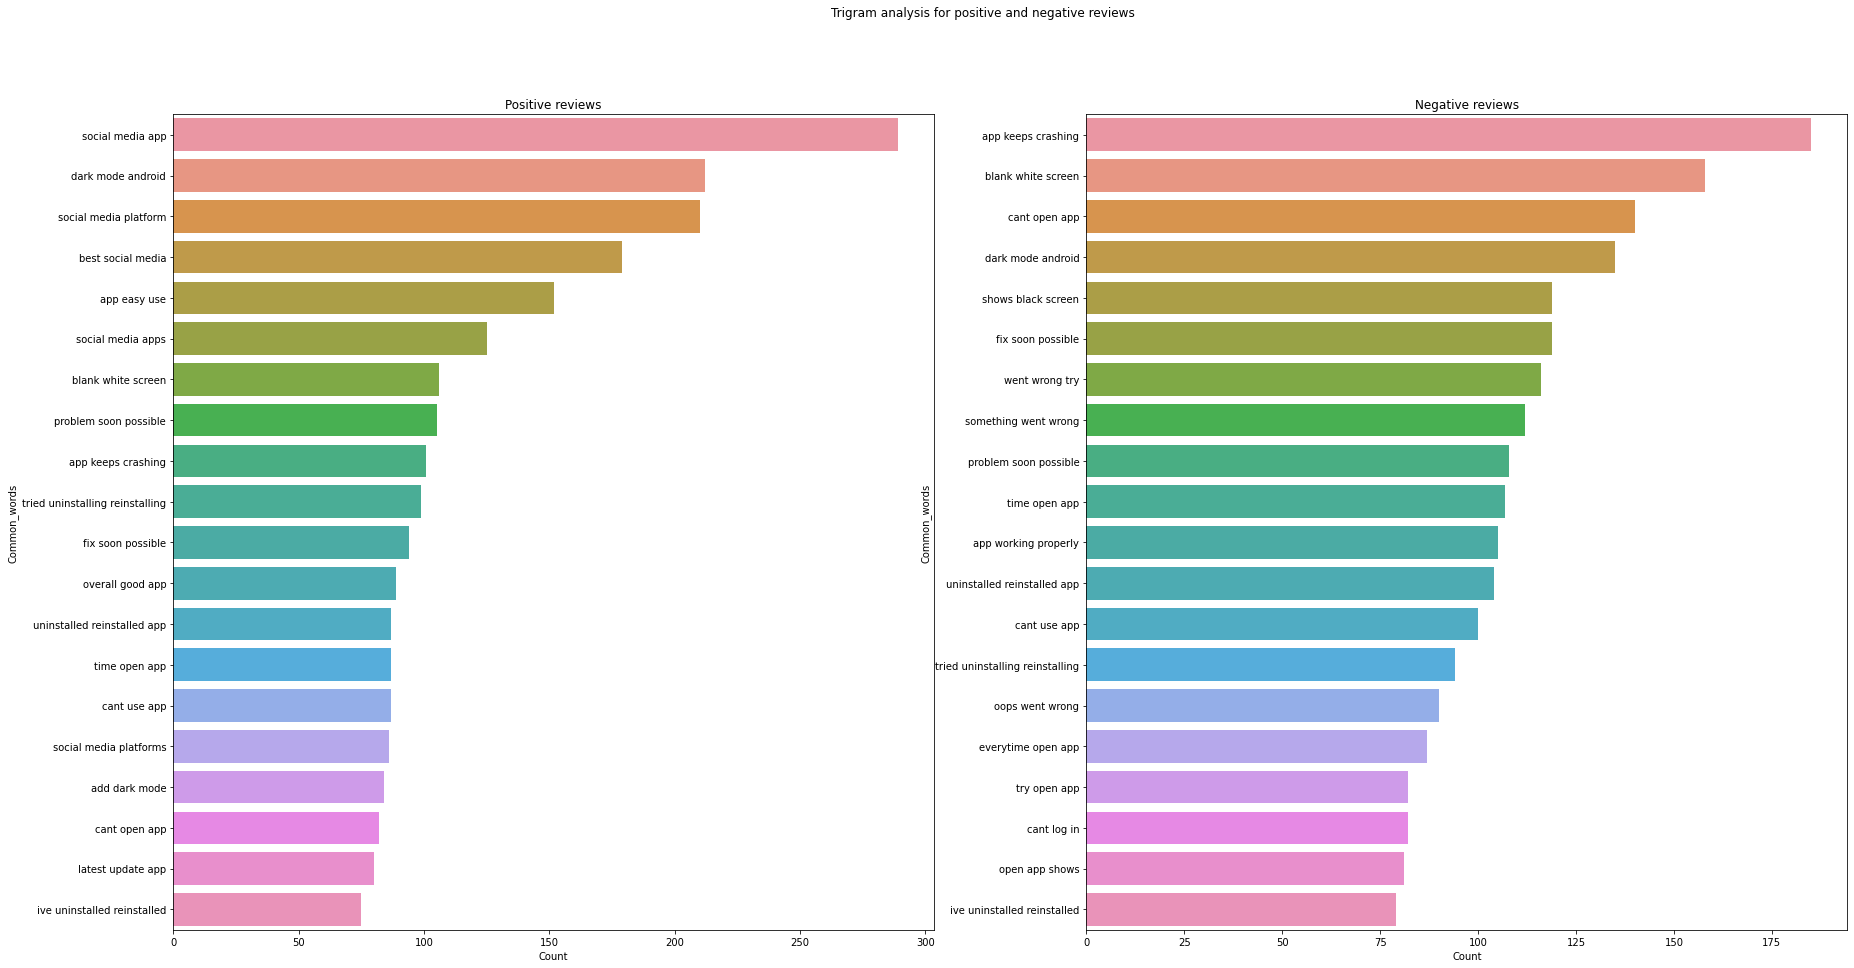

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [105]:
df.rename(columns = {'Clean_Text':'review'}, inplace = True)

In [106]:
df

,content,score,at,review,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,2022-09-13 18:43:11,snapscore updating properly bug found,-0.062500,0.237500,0
1,not getting notifications even though notifica...,1,2022-09-13 18:39:43,getting notifications notifications,0.000000,0.000000,0
2,it's super fun app...!!! can you please upload...,5,2022-09-13 18:30:50,super fun app upload saree outfit snapchat,0.459635,0.433333,1
3,- not consumer friendly. ads and unskippable a...,1,2022-09-13 18:23:26,consumer friendly ads unskippable ads stories...,0.065476,0.416667,1
4,i only want notifications for messages from fr...,1,2022-09-13 18:08:44,want notifications messages friends giving ad ...,-0.050000,0.441667,0
...,...,...,...,...,...,...,...
19995,overall app experience is good but for devices...,4,2018-09-13 19:02:09,overall app experience good devices like s8 s9...,0.350000,0.425000,1
19996,i think there is a bug or maybe its just me. b...,3,2018-09-13 08:17:48,think bug maybe me receive notificacion single...,0.032143,0.403571,1
19997,"great app, love the updates. only problem is t...",5,2018-09-13 06:57:42,great app love updates problem android 9 tappi...,0.200000,0.575000,1
19998,"ever since the last update, pictures don't loa...",3,2018-09-12 22:25:00,update pictures load wifi wifi connection fine...,0.040278,0.488889,1


In [107]:
df.to_csv(r'C:\Users\raksh\Downloads\Compressed\Final_Project-20221204T140354Z-001\Final_Project\data\data.csv',index=False)

In [108]:
train, test= train_test_split(df, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [109]:
#converting target variable to numeric labels
df.sentiment = [ 'positive' if each == 1 else 'negative' for each in df.sentiment]

In [110]:
df

,content,score,at,review,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,2022-09-13 18:43:11,snapscore updating properly bug found,-0.062500,0.237500,negative
1,not getting notifications even though notifica...,1,2022-09-13 18:39:43,getting notifications notifications,0.000000,0.000000,negative
2,it's super fun app...!!! can you please upload...,5,2022-09-13 18:30:50,super fun app upload saree outfit snapchat,0.459635,0.433333,positive
3,- not consumer friendly. ads and unskippable a...,1,2022-09-13 18:23:26,consumer friendly ads unskippable ads stories...,0.065476,0.416667,positive
4,i only want notifications for messages from fr...,1,2022-09-13 18:08:44,want notifications messages friends giving ad ...,-0.050000,0.441667,negative
...,...,...,...,...,...,...,...
19995,overall app experience is good but for devices...,4,2018-09-13 19:02:09,overall app experience good devices like s8 s9...,0.350000,0.425000,positive
19996,i think there is a bug or maybe its just me. b...,3,2018-09-13 08:17:48,think bug maybe me receive notificacion single...,0.032143,0.403571,positive
19997,"great app, love the updates. only problem is t...",5,2018-09-13 06:57:42,great app love updates problem android 9 tappi...,0.200000,0.575000,positive
19998,"ever since the last update, pictures don't loa...",3,2018-09-12 22:25:00,update pictures load wifi wifi connection fine...,0.040278,0.488889,positive


In [111]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(Xtrain,ytrain)

C:\Users\raksh\anaconda3\envs\sentiment\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [35]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [36]:
# Check Accuracy
pipe_lr.score(Xtest,ytest)

0.86675

In [37]:
# Make A Prediction
ex1 = "This book is bad"
pipe_lr.predict([ex1])

array([0], dtype=int64)

In [38]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.98706514, 0.01293486]])

In [41]:
# Save Model & Pipeline
import joblib
pipeline_file = open("lr_senttttt.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [61]:
!pip install autoNLP

  Using cached huggingface_hub-0.0.12-py3-none-any.whl (37 kB)
  Using cached datasets-1.11.0-py3-none-any.whl (264 kB)
  Using cached tqdm-4.49.0-py2.py3-none-any.whl (69 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.11.0
    Uninstalling huggingface-hub-0.11.0:
      Successfully uninstalled huggingface-hub-0.11.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.7.1
    Uninstalling datasets-2.7.1:
      Successfully uninstalled datasets-2.7.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.24.0 requires huggingface-hub<1.0,>=0.10.0, but you have huggingface-hub 0.0.12 which is incompatible.
spacy 3.3.1 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.2 which is incompatible.
spacy-transformers 1.1.5 requires transformers<4.18.0,>=3.4.0, but you have transformers 4.24.0 which is incompatible.
sentence-transformers 2.2.2 requires huggingface-hub>=0.4.0, but you have huggingface-hub 0.0.12 which is incompatible.
imbalanced-ensemble 0.1.7 requires tqdm>=4.50.2, but you have tqdm 4.49.0 which is incompatible.


In [62]:
!pip install autoviml

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.49.0
    Uninstalling tqdm-4.49.0:
      Successfully uninstalled tqdm-4.49.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.24.0 requires huggingface-hub<1.0,>=0.10.0, but you have huggingface-hub 0.0.12 which is incompatible.
spacy 3.3.1 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.2 which is incompatible.
spacy-transformers 1.1.5 requires transformers<4.18.0,>=3.4.0, but you have transformers 4.24.0 which is incompatible.
sentence-transformers 2.2.2 requires huggingface-hub>=0.4.0, but you have huggingface-hub 0.0.12 which is incompatible.
autonlp 0.3.7 requires tqdm==4.49, but you have tqdm 4.64.1 which is incompatible.


In [63]:
!pip install autoviml

In [29]:
train, test = train_test_split(df, test_size=0.2)

In [65]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [30]:
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Auto NLP processing on NLP Column: review
Shape of Train Data: 64000 rows
    Shape of Test Data: 16000 rows


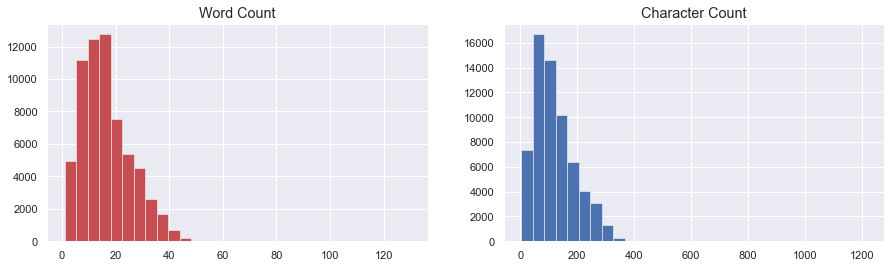

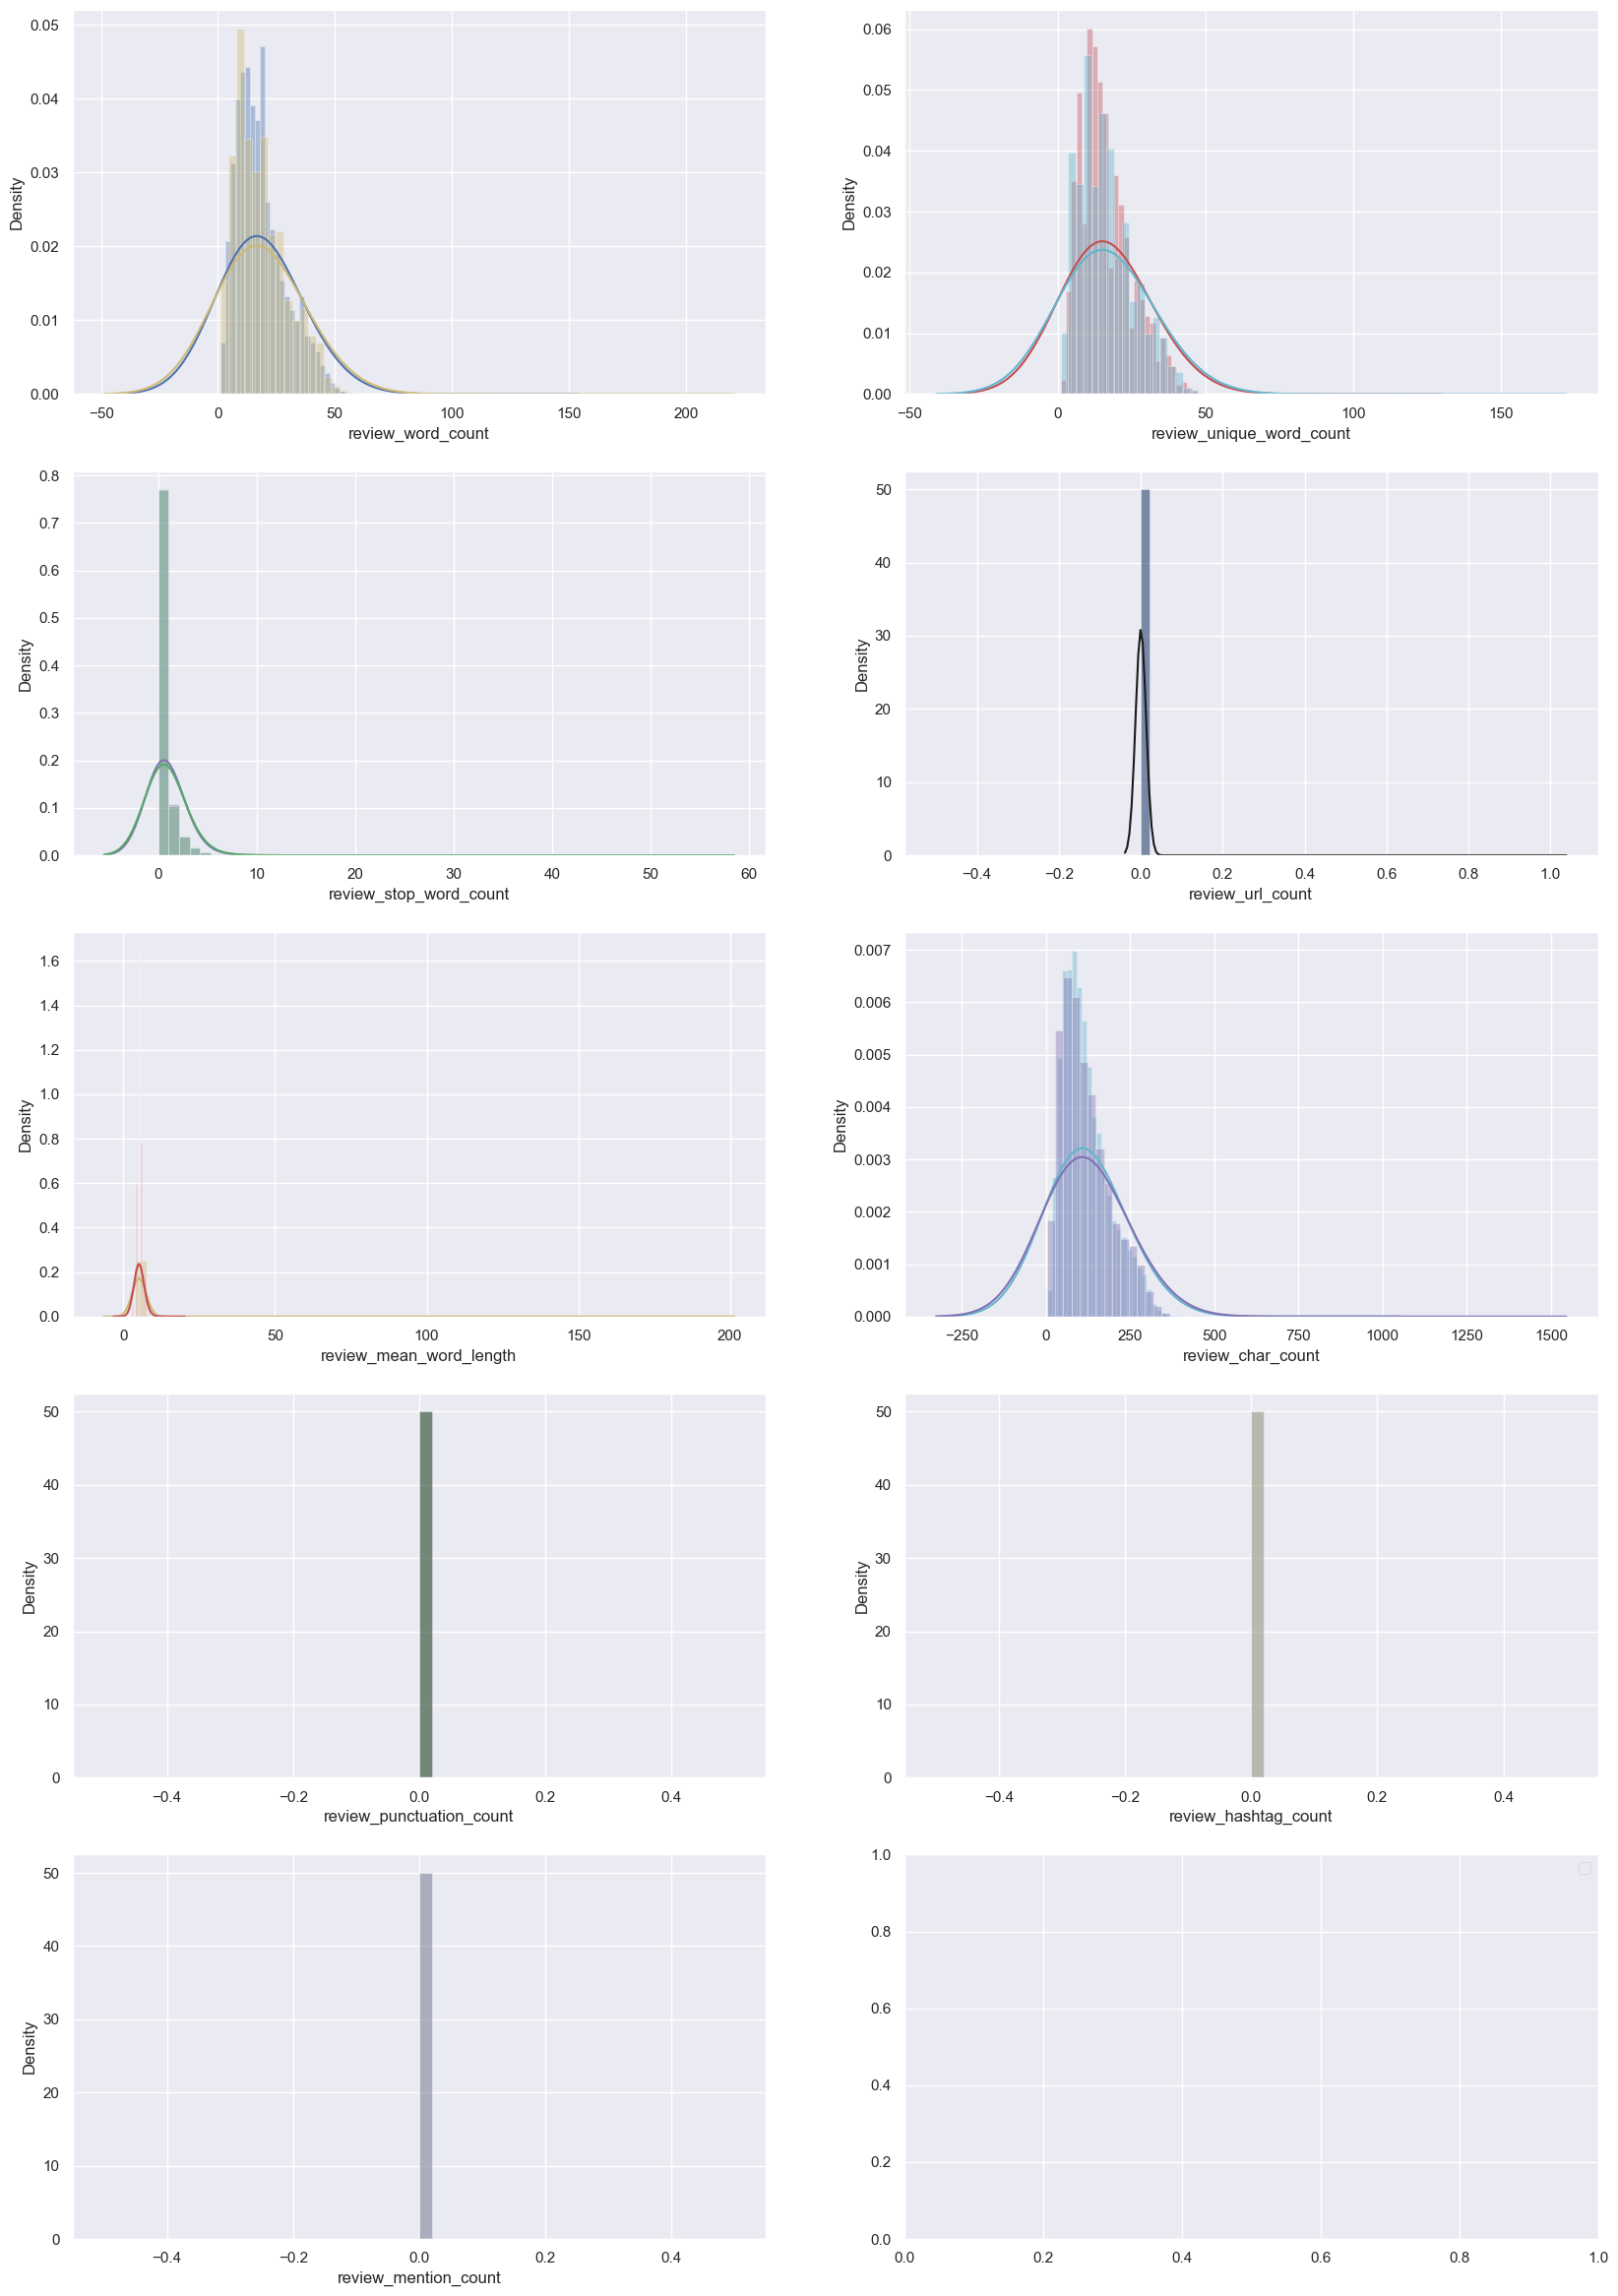

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for review column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 184 seconds
Train data Text cleaning completed. Time taken = 196 seconds

For target = sentiment

    For class = 0
Top 200 n-grams
: ['update', 'work', 'fix', 'cant', 'open', 'time', 'try', 'problem', 'account', 'bad', 'like', 'screen', 'issue', 'phone', 'use', 'im', 'show', 'post', 'annoy', 'message', 'instagram', 'video', 'keep', 'go', 'load', 'send', 'crash', 'twitter', 'ive', 'new', 'notification', 'bug', 'day', 'reinstall', 'log', 'snapchat', 'stop', 'people', 'story', 'want', 'need', 'unable', 'change', 'snap', 'option', 'soon', 'know', 'wrong', 'help', 'android', 'reel', 'able', 'linkedin', 'page', 'delete', 'add', 'let', 'happen', 'possible', 'login

MemoryError: Unable to allocate 53.2 GiB for an array with shape (51200, 139515) and data type float64

In [70]:

nlp_column = 'review'
target = 'sentiment'

train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column, train, test, target, score_type='balanced_accuracy', modeltype='Classification', top_num_features=250, verbose = 2, build_model=True
)

In [113]:
#Vectorizing data

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)
count_vect = CountVectorizer() # CountVectorizer
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

In [114]:
Xtest_tfidf

<16000x37032 sparse matrix of type '<class 'numpy.float64'>'
	with 251957 stored elements in Compressed Sparse Row format>

Logistic Regression Accuracy : 86.21%
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6729
           1       0.89      0.87      0.88      9271

    accuracy                           0.86     16000
   macro avg       0.86      0.86      0.86     16000
weighted avg       0.86      0.86      0.86     16000



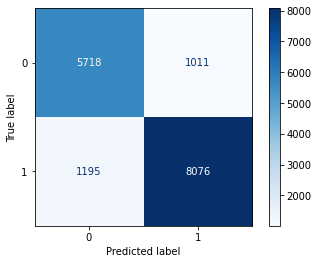

In [118]:
import warnings
warnings.filterwarnings("ignore")
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p1))

Logistic Regression Accuracy : 86.21%
[[5718 1011]
 [1195 8076]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6729
           1       0.89      0.87      0.88      9271

    accuracy                           0.86     16000
   macro avg       0.86      0.86      0.86     16000
weighted avg       0.86      0.86      0.86     16000



C:\Users\raksh\anaconda3\envs\sentiment\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raksh\anaconda3\envs\sentiment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


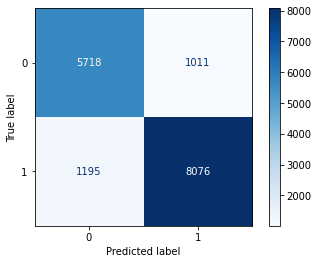

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(confusion_matrix(ytest, p1))
print(metrics.classification_report(ytest, p1))

C:\Users\raksh\anaconda3\envs\sentiment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


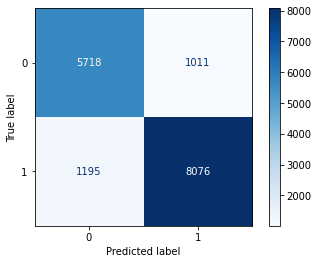

In [116]:
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.savefig('filename.png')

In [ ]:
for matrix in confusion_matrices:
    fig = plt.figure()
    plt.matshow(cm)
    plt.title('Problem 1: Confusion Matrix Digit Recognition')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')
    plt.savefig('confusion_matrix'+str(learning_values.pop())+'.jpg')

Linear Support Vector Classifier Accuracy : 86.36%
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6729
           1       0.90      0.86      0.88      9271

    accuracy                           0.86     16000
   macro avg       0.86      0.86      0.86     16000
weighted avg       0.87      0.86      0.86     16000



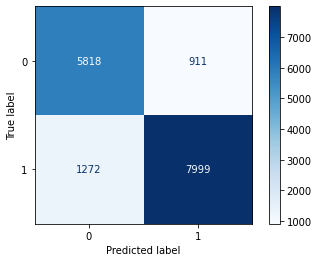

In [39]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p3=linear_svc.predict(Xtest_tfidf)
s3=accuracy_score(ytest,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p3))

XGBoost Accuracy : 85.01%
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6729
           1       0.91      0.82      0.86      9271

    accuracy                           0.85     16000
   macro avg       0.85      0.85      0.85     16000
weighted avg       0.86      0.85      0.85     16000



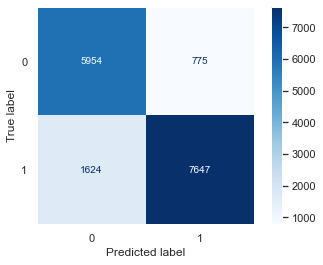

In [74]:
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,ytrain)
p4=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(ytest,p4)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p4))

In [45]:
Xtest_tfidf

<16000x37032 sparse matrix of type '<class 'numpy.float64'>'
	with 251957 stored elements in Compressed Sparse Row format>

Random Forest Accuracy : 85.01%
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      6729
           1       0.87      0.82      0.85      9271

    accuracy                           0.82     16000
   macro avg       0.82      0.82      0.82     16000
weighted avg       0.83      0.82      0.83     16000



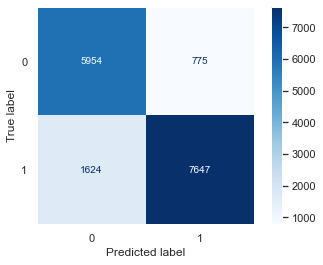

In [75]:
rf = RandomForestClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p5=rf.predict(Xtest_tfidf)
s5=accuracy_score(ytest,p4)
print("Random Forest Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p5))

In [41]:
import pickle

In [44]:
filename = 'finalized_model_lr.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [51]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(Xtrain_tfidf,ytrain)

AttributeError: lower not found